In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.stats.proportion
import tikzplotlib
import re

In [5]:
profession_sentiment_df = pd.read_csv('data/analysis_data/top500_merged_profession_sentiment.csv', index_col=[0,1,2])

In [6]:
profession_sentiment_df

imdb
profession    year sentiment      
doctor        1950 -1           31
                    0         1398
                    1          112
              1951 -1           19
                    0         1209
...                            ...
sketch artist 2016  0           35
                    1            2
              2017 -1            0
                    0           13
                    1            3

[102000 rows x 1 columns]

In [7]:
professions = profession_sentiment_df.index.get_level_values(level='profession').unique()

In [8]:
len(professions)

500

In [14]:
srs = profession_sentiment_df.loc[('doctor',slice(None),1),:].droplevel(['profession','sentiment'])

In [20]:
srs.loc[1950:1960]

,imdb
year,
1950,112
1951,110
1952,76
1953,99
1954,85
1955,123
1956,106
1957,137
1958,139


In [24]:
srs.sum()[0]

30139

In [28]:
profession_sentiment_df.loc[('doctor',slice(1950:1960),1),:]

SyntaxError: invalid syntax (<ipython-input-28-ceb6912b362b>, line 1)

In [51]:
records = []

for profession in professions:
    record = [profession]
    pos = profession_sentiment_df.loc[(profession, slice(None), 1),:].droplevel(['profession','sentiment'])
    neg = profession_sentiment_df.loc[(profession, slice(None), -1),:].droplevel(['profession','sentiment'])
    
#     proportion
    n, N = pos.sum()[0], pos.sum()[0] + neg.sum()[0]
    p = n/N
    _, pvalue = statsmodels.stats.proportion.proportions_ztest(n, N, value=0.5, alternative='two-sided')
    record += [p, pvalue]
    
    n, N = pos.loc[2010:2017].sum()[0], pos.loc[2010:2017].sum()[0] + neg.loc[2010:2017].sum()[0]
    p = n/N
    _, pvalue = statsmodels.stats.proportion.proportions_ztest(n, N, value=0.5, alternative='two-sided')
    record += [p, pvalue]
    
    n, N = pos.loc[2000:2009].sum()[0], pos.loc[2000:2009].sum()[0] + neg.loc[2000:2009].sum()[0]
    p = n/N
    _, pvalue = statsmodels.stats.proportion.proportions_ztest(n, N, value=0.5, alternative='two-sided')
    record += [p, pvalue]
    
    n, N = pos.loc[1990:1999].sum()[0], pos.loc[1990:1999].sum()[0] + neg.loc[1990:1999].sum()[0]
    p = n/N
    _, pvalue = statsmodels.stats.proportion.proportions_ztest(n, N, value=0.5, alternative='two-sided')
    record += [p, pvalue]
    
#     correlation
    x = pos.values.flatten()/(pos.values.flatten() + neg.values.flatten() + 1e-23)
    t = np.arange(68)
    corr, pvalue = scipy.stats.spearmanr(t, x)
    record += [corr, pvalue]
    
    x = pos.loc[2010:2017].values.flatten()/(pos.loc[2010:2017].values.flatten() + neg.loc[2010:2017].values.flatten() + 1e-23)
    t = np.arange(8)
    corr, pvalue = scipy.stats.spearmanr(t, x)
    record += [corr, pvalue]
    
    x = pos.loc[2000:2009].values.flatten()/(pos.loc[2000:2009].values.flatten() + neg.loc[2000:2009].values.flatten() + 1e-23)
    t = np.arange(10)
    corr, pvalue = scipy.stats.spearmanr(t, x)
    record += [corr, pvalue]
    
    x = pos.loc[1990:1999].values.flatten()/(pos.loc[1990:1999].values.flatten() + neg.loc[1990:1999].values.flatten() + 1e-23)
    corr, pvalue = scipy.stats.spearmanr(t, x)
    record += [corr, pvalue]
    
    records.append(record)
    
sentiment_df = pd.DataFrame(records, columns=['profession','prop','pval','prop_2010_2017','pval_2010_2017','prop_2000_2009','pval_2000_2009','prop_1990_1999','pval_1990_1999','corr','corr_pval','corr_2010_2017','corr_pval_2010_2017','corr_2000_2009','corr_pval_2000_2009','corr_1990_1999','corr_pval_1990_1999'])

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


In [77]:
for _, row in sentiment_df[sentiment_df.pval < 0.05].sort_values(by='prop')[['profession','prop','pval']].iterrows():
    idx = professions.to_list().index(row.profession)
    if idx < 100:
        print(f'{row.profession:50s} idx={idx + 1:3d}\tprop={row.prop:.2f}')

cop                                                idx=  4	prop=0.32
dealer                                             idx= 75	prop=0.37
police                                             idx=  2	prop=0.38
spy                                                idx= 39	prop=0.42
nun                                                idx= 79	prop=0.43
monk                                               idx= 57	prop=0.44
guard                                              idx= 18	prop=0.45
maid                                               idx= 45	prop=0.53
clerk                                              idx= 91	prop=0.54
nanny                                              idx= 73	prop=0.56
cowboy                                             idx= 60	prop=0.58
sheriff                                            idx= 27	prop=0.60
principal                                          idx= 62	prop=0.61
therapist                                          idx= 81	prop=0.62
reporter                          

In [81]:
for _, row in sentiment_df[sentiment_df.corr_pval < 0.05].sort_values(by='corr')[['profession','corr','corr_pval']].iterrows():
    idx = professions.to_list().index(row.profession)
    if idx < 100:
        print(f'{row.profession:50s} idx={idx + 1:3d}\tcorr={row["corr"]:.2f}')

doctor                                             idx=  1	corr=-0.62
lawyer                                             idx=  9	corr=-0.51
professor                                          idx= 13	corr=-0.44
president                                          idx=  6	corr=-0.43
nurse                                              idx= 23	corr=-0.42
commissioner                                       idx= 48	corr=-0.38
secretary                                          idx= 32	corr=-0.37
scientist                                          idx= 34	corr=-0.37
mechanic                                           idx= 95	corr=-0.36
manager                                            idx= 20	corr=-0.35
operator                                           idx= 85	corr=-0.35
surgeon                                            idx= 52	corr=-0.35
artist                                             idx= 19	corr=-0.34
officer                                            idx=  5	corr=-0.32
priest              

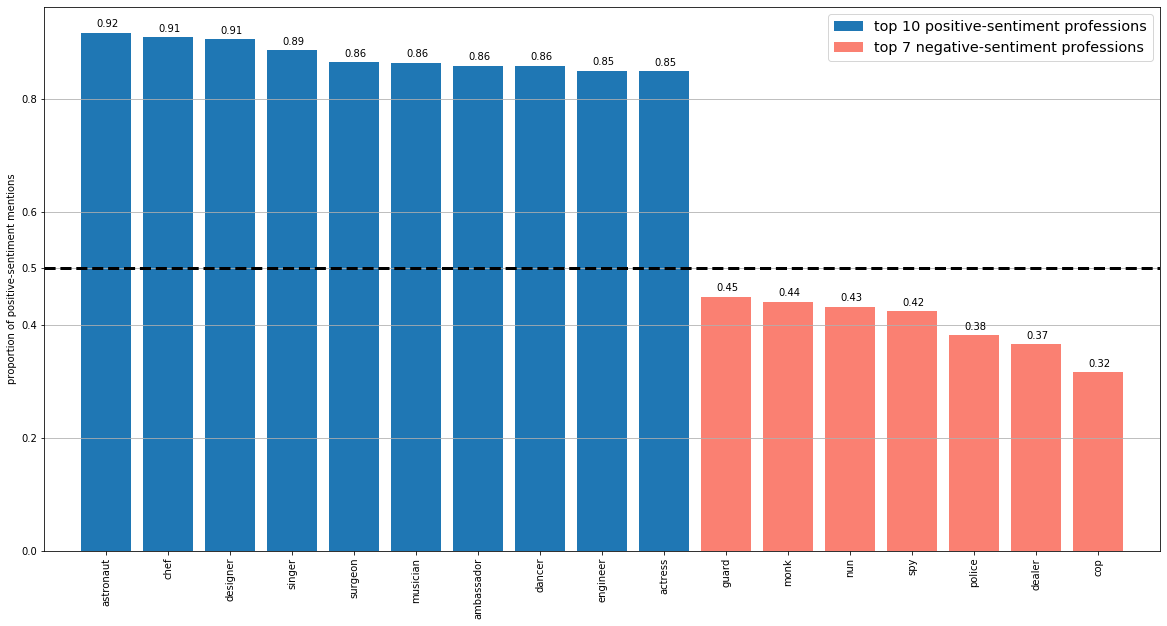

In [114]:
professions = list(reversed(['cop','dealer','police','spy','nun','monk','guard','actress','engineer','dancer','ambassador','musician','surgeon','singer','designer','chef','astronaut']))
proportions = []

for profession in professions:
    prop = sentiment_df.loc[sentiment_df.profession == profession, 'prop'].values[0]
    proportions.append(prop)

pos_professions = professions[:10]
pos_proportions = proportions[:10]
neg_professions = professions[10:]
neg_proportions = proportions[10:]

plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(pos_professions)), pos_proportions, label='top 10 positive-sentiment professions')
plt.bar(10 + np.arange(len(neg_professions)), neg_proportions, label='top 7 negative-sentiment professions', color='salmon')

plt.xticks(ticks=np.arange(len(professions)), labels=professions, rotation=90)
plt.yticks(ticks=[0,0.2,0.4,0.5,0.6,0.8])
plt.xlim(-1, len(professions))
plt.grid(which='major', axis='y')
plt.ylabel('proportion of positive-sentiment mentions')
plt.legend(fontsize='x-large')

for i, proportion in enumerate(proportions):
    plt.text(i-0.15, proportion + 0.01, f'{proportion:.2f}')

t = np.arange(len(professions))
t[0], t[-1] = -1, len(professions)
y = np.full(len(professions), fill_value=0.5)
plt.plot(t, y, lw=3, color='black', ls='--')

tikzplotlib.save('data/analysis_data/profession_sentiment_avg.tex')

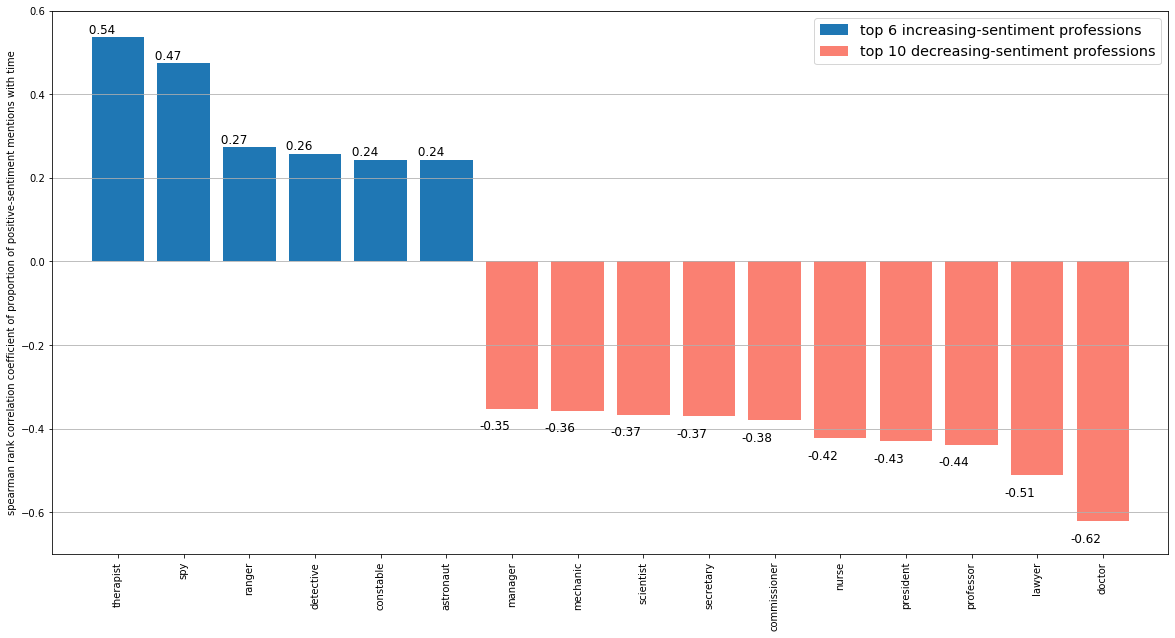

In [158]:
professions = ['therapist','spy','ranger','detective','constable','astronaut','manager','mechanic','scientist','secretary','commissioner','nurse','president','professor','lawyer','doctor']
correlations = []

for profession in professions:
    corr = sentiment_df.loc[sentiment_df.profession == profession, 'corr'].values[0]
    correlations.append(corr)

pos_professions = professions[:6]
pos_correlations = correlations[:6]
neg_professions = professions[6:]
neg_correlations = correlations[6:]

plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(pos_professions)), pos_correlations, label='top 6 increasing-sentiment professions')
plt.bar(6 + np.arange(len(neg_professions)), neg_correlations, label='top 10 decreasing-sentiment professions', color='salmon')

plt.xticks(ticks=np.arange(len(professions)), labels=professions, rotation=90)
plt.xlim(-1, len(professions))
plt.ylim(-0.7, 0.6)
plt.grid(which='major', axis='y')
plt.ylabel('spearman rank correlation coefficient of proportion of positive-sentiment mentions with time')
plt.legend(fontsize='x-large')

for i, correlation in enumerate(correlations):
    if correlation > 0:
        plt.text(i-0.5, correlation + 0.01, f'{correlation:5.2f}', fontsize='large')
    else:
        plt.text(i-0.5, correlation - 0.05, f'{correlation:5.2f}', fontsize='large')

tikzplotlib.save('data/analysis_data/profession_sentiment_trend.tex')

content = open('data/analysis_data/profession_sentiment_trend.tex').read()
for correlation in correlations:
    content = re.sub(f'{{{correlation:5.2f}}}', f'{{\large{{\\\\textbf{{{correlation:5.2f}}}}}}}', content)
content = re.sub('\\\\begin{tikzpicture}','\pgfplotsset{width=16cm,height=9cm}\n\\\\begin{tikzpicture}',content)    

open('data/analysis_data/profession_sentiment_trend.tex','w').write(content);

In [134]:
content = open('data/analysis_data/profession_sentiment_trend.tex').read()

In [136]:
content

'% This file was created by tikzplotlib v0.9.4.\n\\begin{tikzpicture}\n\n\\definecolor{color0}{rgb}{0.12156862745098,0.466666666666667,0.705882352941177}\n\\definecolor{color1}{rgb}{0.980392156862745,0.501960784313725,0.447058823529412}\n\n\\begin{axis}[\nlegend cell align={left},\nlegend style={fill opacity=0.8, draw opacity=1, text opacity=1, draw=white!80!black},\ntick align=outside,\ntick pos=left,\nx grid style={white!69.0196078431373!black},\nxmin=-1, xmax=16,\nxtick style={color=black},\nxtick={0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15},\nxticklabel style = {rotate=90.0},\nxticklabels={therapist,spy,ranger,detective,constable,astronaut,manager,mechanic,scientist,secretary,commissioner,nurse,president,professor,lawyer,doctor},\ny grid style={white!69.0196078431373!black},\nylabel={spearman rank correlation coefficient of proportion of positive-sentiment mentions with time},\nymajorgrids,\nymin=-0.67847474831034, ymax=0.594520335632854,\nytick style={color=black}\n]\n\\draw[draw=none,

In [137]:
text = '{0.85}'

In [144]:
d = 0.853
re.sub(f'{{{d:.2f}}}', f'{{\large{{\\\\textbf{{{d:.2f}}}}}}}', text)

'{\\large{\\textbf{0.85}}}'

In [148]:
print(re.sub('\\\\begin{tikzpicture}','\pgfplotsset{width=16cm,height=9cm}\n\\\\begin{tikzpicture}',content))

% This file was created by tikzplotlib v0.9.4.
\pgfplotsset{width=16cm,height=9cm}
\begin{tikzpicture}

\definecolor{color0}{rgb}{0.12156862745098,0.466666666666667,0.705882352941177}
\definecolor{color1}{rgb}{0.980392156862745,0.501960784313725,0.447058823529412}

\begin{axis}[
legend cell align={left},
legend style={fill opacity=0.8, draw opacity=1, text opacity=1, draw=white!80!black},
tick align=outside,
tick pos=left,
x grid style={white!69.0196078431373!black},
xmin=-1, xmax=16,
xtick style={color=black},
xtick={0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15},
xticklabel style = {rotate=90.0},
xticklabels={therapist,spy,ranger,detective,constable,astronaut,manager,mechanic,scientist,secretary,commissioner,nurse,president,professor,lawyer,doctor},
y grid style={white!69.0196078431373!black},
ylabel={spearman rank correlation coefficient of proportion of positive-sentiment mentions with time},
ymajorgrids,
ymin=-0.67847474831034, ymax=0.594520335632854,
ytick style={color=black}
]
\draw[dra